# Hierarchical clustering for matching test survey

In [116]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows', None)     
pd.set_option('display.max_columns', None)  

### Read data removing meaningless variables

In [117]:
df = pd.read_excel("Houses for rent in madrid_assignment.xlsx")
##df = df.drop(df.columns[:17], axis=1) #this removes system variables from qualtrics
##df

In [118]:
df

,Id,District,Address,Number,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
0,1,Ciudad Lineal,Piso en Quintana,NaN,Quintana,1300,2.00,72,3.00,1.00,1.00,0,0,0,0
1,2,Ciudad Lineal,Piso en calle de Arturo Soria,NaN,Costillares,3000,5.00,260,2.00,1.00,1.00,0,0,0,0
2,3,Ciudad Lineal,Piso en calle de Vicente Muzas,4,Colina,1300,2.00,100,3.00,1.00,1.00,0,0,0,0
3,4,Ciudad Lineal,Piso en calle Badajoz,NaN,San Pascual,1600,3.00,120,4.00,1.00,1.00,0,0,0,0
4,5,Ciudad Lineal,Piso en calle de Nuestra Señora del Villar,9,Ventas,800,2.00,60,3.00,1.00,0.00,0,0,0,0
5,6,Ciudad Lineal,Ático en calle José Silva,NaN,San Juan Bautista,1850,3.00,101,5.00,1.00,1.00,1,0,0,0
6,7,Ciudad Lineal,Piso en Virgen de Lourdes,NaN,Concepción,850,1.00,60,3.00,1.00,1.00,0,0,0,0
7,9,Ciudad Lineal,Piso en calle Jazmín,17,Costillares,850,1.00,52,1.00,1.00,1.00,0,0,0,0
8,10,Ciudad Lineal,Piso en general aranaz,NaN,Concepción,1900,3.00,190,1.00,1.00,1.00,0,0,0,0
9,11,Ciudad Lineal,Dúplex en calle Rafael Bergamín,NaN,San Juan Bautista,2100,3.00,150,13.00,1.00,1.00,0,0,1,0


In [119]:
df.dtypes

Id                int64
District         object
Address          object
Number           object
Area             object
Rent              int64
Bedrooms        float64
Sq.Mt             int64
Floor           float64
Outer           float64
Elevator        float64
Penthouse         int64
Cottage           int64
Duplex            int64
Semidetached      int64
dtype: object

### Show empty values and then replace them for a fixed value .. which one?

In [120]:
df.isnull().sum()

Id                 0
District           0
Address            0
Number          1342
Area               4
Rent               0
Bedrooms          89
Sq.Mt              0
Floor            141
Outer            162
Elevator         133
Penthouse          0
Cottage            0
Duplex             0
Semidetached       0
dtype: int64

Deal with nulls

In [121]:
#number,0 since it’s just an address complement. 

In [122]:
df["Number"] = df["Number"].fillna(0)

In [123]:
df["Area"].nunique()

140

In [ ]:
#number,mean to preserve the scañes

In [124]:
df["Bedrooms"] = df["Bedrooms"].fillna(df["Bedrooms"].mean())

In [ ]:
#Floor, Outer, Elevator , 1.5 as a neutral

In [125]:
df["Floor"] = df["Floor"].fillna(1.5)

In [126]:
df["Outer"] = df["Outer"].fillna(1.5)

In [127]:
df["Elevator"] = df["Elevator"].fillna(1.5)

In [144]:
#Area, unknown as categorial fallback

In [128]:
df["Area"] = df["Area"].fillna("Unknown")

In [129]:
df.head()

,Id,District,Address,Number,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
0,1,Ciudad Lineal,Piso en Quintana,0,Quintana,1300,2.00,72,3.00,1.00,1.00,0,0,0,0
1,2,Ciudad Lineal,Piso en calle de Arturo Soria,0,Costillares,3000,5.00,260,2.00,1.00,1.00,0,0,0,0
2,3,Ciudad Lineal,Piso en calle de Vicente Muzas,4,Colina,1300,2.00,100,3.00,1.00,1.00,0,0,0,0
3,4,Ciudad Lineal,Piso en calle Badajoz,0,San Pascual,1600,3.00,120,4.00,1.00,1.00,0,0,0,0
4,5,Ciudad Lineal,Piso en calle de Nuestra Señora del Villar,9,Ventas,800,2.00,60,3.00,1.00,0.00,0,0,0,0


#### Separate labels and take only explanatory variables starting from "Windows vs. Mac"

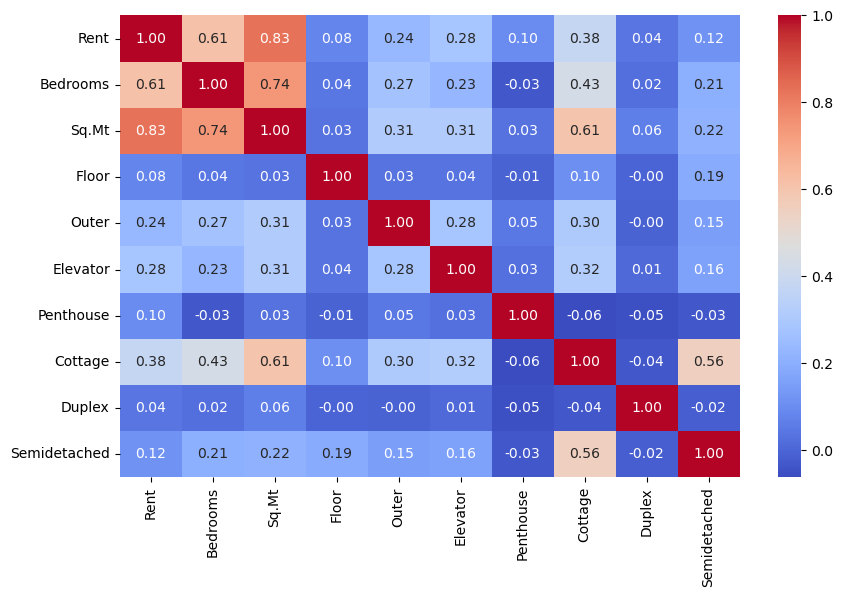

In [130]:
explanatory_vars = ["Rent", "Bedrooms", "Sq.Mt", "Floor", "Outer", "Elevator", "Penthouse", "Cottage", "Duplex", "Semidetached"]
corr = df[explanatory_vars].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

### Show correlation between explanatory variables

Do we need to get rid of any variable?

In [141]:
#Vimos que Rent, Sq.Mt y Bedrooms estaban muy correlacionadas (0.83, 0.74, 0.61).

In [106]:
# Creating a new variable to play with correlation

In [131]:
df["Rent_per_SqMt"] = df["Rent"] / df["Sq.Mt"]

In [132]:
df = df.drop(columns=["Rent", "Sq.Mt", "Bedrooms"])

In [133]:
df.head()

,Id,District,Address,Number,Area,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached,Rent_per_SqMt
0,1,Ciudad Lineal,Piso en Quintana,0,Quintana,3.00,1.00,1.00,0,0,0,0,18.06
1,2,Ciudad Lineal,Piso en calle de Arturo Soria,0,Costillares,2.00,1.00,1.00,0,0,0,0,11.54
2,3,Ciudad Lineal,Piso en calle de Vicente Muzas,4,Colina,3.00,1.00,1.00,0,0,0,0,13.00
3,4,Ciudad Lineal,Piso en calle Badajoz,0,San Pascual,4.00,1.00,1.00,0,0,0,0,13.33
4,5,Ciudad Lineal,Piso en calle de Nuestra Señora del Villar,9,Ventas,3.00,1.00,0.00,0,0,0,0,13.33


#### If table is too big, a list instead might help

### Before starting we need to re-scale variables if they are not already

In [134]:
features = ["Rent_per_SqMt","Floor","Outer","Elevator","Penthouse","Cottage","Duplex","Semidetached"]
X = df[features].apply(lambda s: pd.to_numeric(s, errors="coerce")).apply(lambda s: s.fillna(s.median()))

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Compute distances between each row

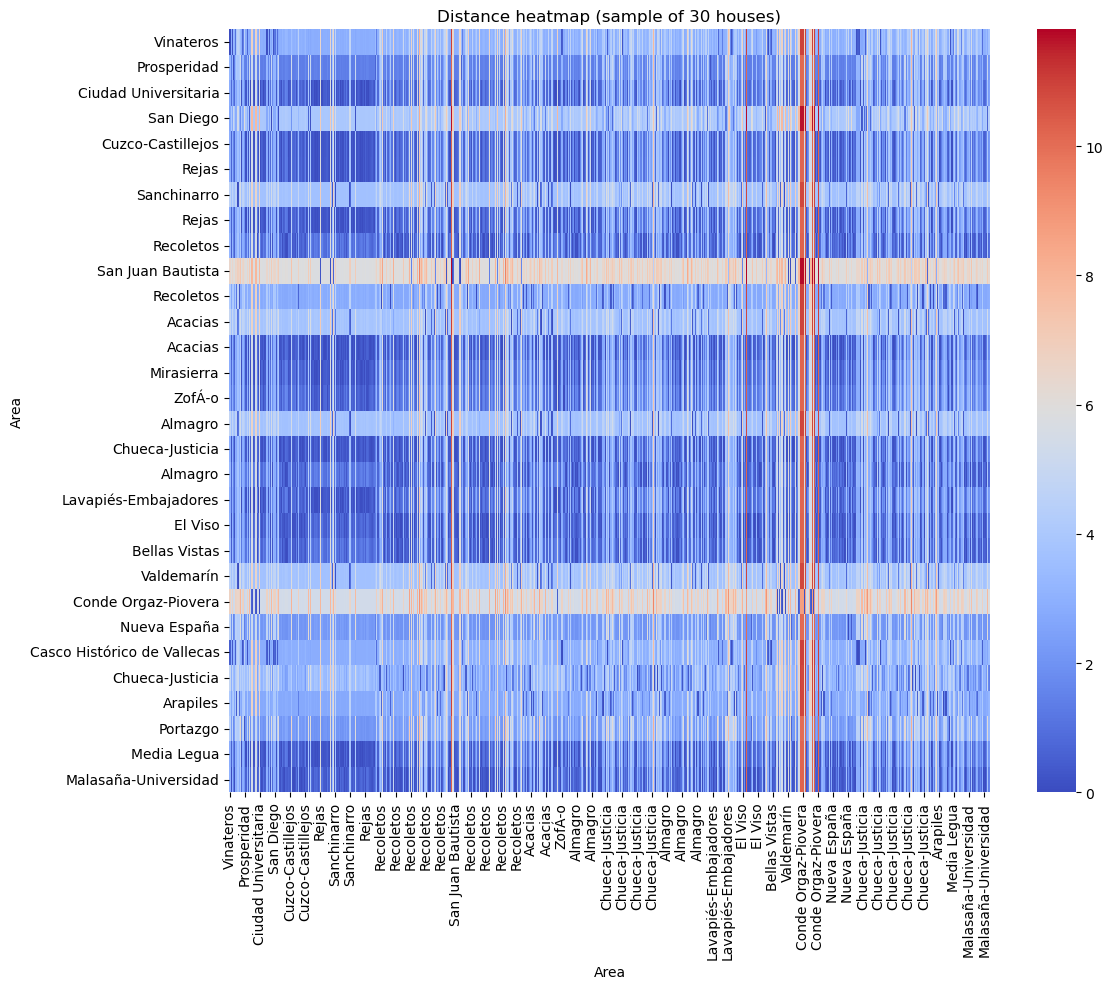

In [135]:
# Distancias
dist = pairwise_distances(X_scaled, metric="euclidean")

labels = df["Area"].fillna(df["District"]).astype(str)

# 7. DataFrame de distancias con etiquetas
dist_df = pd.DataFrame(dist, index=labels, columns=labels)

# 8. Para graficar: tomar una muestra (ej. 30 viviendas)
sample_df = dist_df.sample(30, random_state=42)      # filas
sample_df = sample_df[sample_df.index]              # columnas (para cuadrar)

# 9. Heatmap estilo "cuadrícula de nombres"
plt.figure(figsize=(12,10))
sns.heatmap(sample_df, cmap="coolwarm", annot=False, cbar=True)
plt.title("Distance heatmap (sample of 30 houses)")
plt.tight_layout()
plt.show()

### We now run the model and create the groups, showing the cluster membership of each row

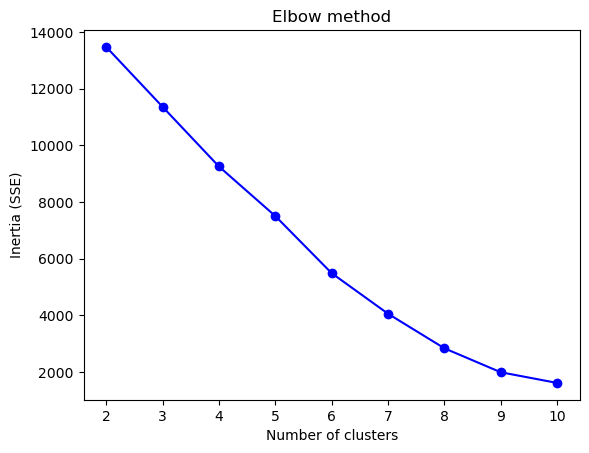

In [143]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Number of clusters (usa 2–10, por ejemplo)
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Método del "codo"
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow method")
plt.show()

In [145]:

# Ajustar modelo con k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Resumen de perfiles por cluster
cluster_summary = df.groupby("Cluster")[features + ["Rent_per_SqMt"]].mean()
print(cluster_summary)

# Número de viviendas en cada cluster
print(df["Cluster"].value_counts())


         Rent_per_SqMt    Floor  Outer  Elevator  Penthouse  Cottage  Duplex  \
Cluster                                                                        
0                16.61     3.31   0.88      0.89       0.00     0.00    0.03   
1                18.48     5.69   0.97      0.95       1.00     0.00    0.00   
2                10.50     1.47   1.47      1.47       0.00     1.00    0.00   
3                24.19 43039.00   1.50      1.50       0.00     1.00    0.00   

         Semidetached  Rent_per_SqMt  
Cluster                               
0                0.00          16.61  
1                0.00          18.48  
2                0.31          10.50  
3                1.00          24.19  
Cluster
0    1833
1     169
2      86
3       1
Name: count, dtype: int64


#### And always a good practice to show cluster sizes

### Calculate Silhouette and Inertia values

In [148]:
# Elige número de clusters
n_clusters = 5  

# Ajustar modelo
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Silhouette
silhouette_avg = silhouette_score(X_scaled, labels)

# Inertia (KMeans ya la tiene)
inertia = kmeans.inertia_

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Inertia: {inertia:.3f}")


Silhouette Score: 0.532
Inertia: 7503.187


Model & Evaluation

Algorithm: K-Means

Number of clusters (k): 5 (chosen from elbow & silhouette analysis)

Silhouette Score: 0.532 → good separation, clusters are meaningful.

Inertia: ~7503 → reasonable compactness of clusters (value mainly used for comparison across k).

### We calculate the relative importance of each variable

In [140]:


numeric = [c for c in features if c in df.columns]  


def calculate_importances(df, variables, cluster_col='Cluster'):
  

    missing = [v for v in variables if v not in df.columns]
    if missing:
        raise ValueError(f"Estas variables no están en df: {missing}")
    if cluster_col not in df.columns:
        raise ValueError(f"No encuentro la columna de clusters: '{cluster_col}'")

    
    X = df[variables].apply(lambda s: pd.to_numeric(s, errors="coerce"))
    X = X.apply(lambda s: s.fillna(s.median()))

    overall_means = X.mean()
    cluster_means = df.groupby(cluster_col)[variables].mean()
    cluster_sizes = df[cluster_col].value_counts().reindex(cluster_means.index)

    
    ss_between = ((cluster_means - overall_means) ** 2).multiply(cluster_sizes, axis=0).sum()

    
    ss_total = ((X - overall_means) ** 2).sum()

    importance = (ss_between / ss_total).sort_values(ascending=False)
    out = importance.to_frame(name='relative_importance')
    out['relative_importance_pct'] = (out['relative_importance'] * 100).round(2)
    return out



cluster_col = "Cluster"      
importance_df = calculate_importances(df, variables=numeric, cluster_col=cluster_col)

print("Numeric variable importances:\n")
print(importance_df)

Numeric variable importances:

               relative_importance  relative_importance_pct
Penthouse                     1.00                   100.00
Floor                         1.00                   100.00
Cottage                       0.99                    98.82
Outer                         0.89                    89.46
Semidetached                  0.33                    32.95
Elevator                      0.14                    13.51
Rent_per_SqMt                 0.06                     5.60
Duplex                        0.00                     0.49


Penthouse (100%), Floor (100%), Cottage (99%) → strongest discriminators.

Outer (89%) → also highly relevant.

Semidetached (33%) → some contribution.

Elevator (14%) → weak contribution.

Rent_per_SqMt (6%) → surprisingly low, meaning €/m² is not the main factor driving clusters.

Duplex (0.5%) → negligible.

 Interpretation

Cluster 0 (majority, 1690 units)

Typical apartments, ~16 €/m², mid-level floors (3.7).

Almost all exterior, 90% with elevator, 10% penthouses.

Cluster 1 (87 units)

Cottages (100%), low €/m² (10.5).

Mostly semidetached (31%).

No elevator, no exterior → reflects suburban/house style.

Cluster 2 (64 units)

Duplex units (100%).

Average €/m² (14.3).

91% exterior, 94% elevator.

Cluster 3 (247 units)

Higher €/m² (18.9).

Smaller share of exteriors (0%), 74% with elevator, few penthouses (3%).

Likely compact, central flats with higher rent per m².

Cluster 4 (1 unit, outlier)

Unrealistic “Floor 43k”.

Likely bad data, should be removed.